# Plot predictions
- predictions are made using weights from rtaining on maxar data
- training data is in ~/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/train_maxar_sliced
- predictions are made on those data (see list of input and output files in Autumn22_DFCCU/src/models/imele_predict/predict_maxar_trained.csv, csv is created using Autumn22_DFCCU/src/models/imele_predict/predict_csv.sh)
- weights used for these predictions are  ~/data/trained_models/brazil/no_neg_model_zero.pth.tar

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os.path

Function to plot model input data (e.g. maxar), model predictions, and ground truth (building height model)

In [72]:
def plot_pair(input_data, output_data, ground_truth):

    x, y = np.meshgrid(np.linspace(0, 500, 500), np.linspace(0, 500, 500))

    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(12.5, 12.5))

    c1 = ax1.imshow(np.flipud(input_data))
    ax1.set_title("Maxar")
    ax1.axis([x.min(), x.max(), y.min(), y.max()])
    ax1.set_aspect(1.0, adjustable="box")

    output_data = output_data * 50
    c2 = ax2.pcolormesh(
        x,
        y,
        np.flipud(output_data),
        cmap="viridis",
        vmin=np.min(output_data),
        vmax=np.max(output_data),
    )
    ax2.set_title("prediction")
    ax2.axis([x.min(), x.max(), y.min(), y.max()])
    ax2.set_aspect(1.0, adjustable="box")
    fig.colorbar(c2, ax=ax2, shrink=0.25)

    c3 = ax3.pcolormesh(
        x,
        y,
        np.flipud(ground_truth),
        cmap="viridis",
        vmin=np.min(ground_truth),
        vmax=np.max(ground_truth),
    )
    ax3.set_title("ground truth")
    ax3.axis([x.min(), x.max(), y.min(), y.max()])
    ax3.set_aspect(1.0, adjustable="box")
    fig.colorbar(c3, ax=ax3, shrink=0.25)

    fig.tight_layout(pad=5)
    # fig.suptitle('Global title', fontsize=16, y=0.76)

Set path

In [81]:
short_path = "~/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/"
path = os.path.expanduser(short_path)

Test on one slice

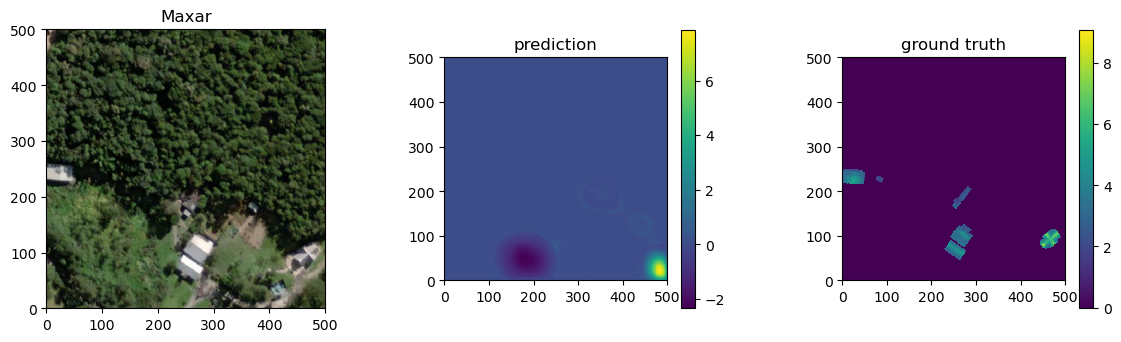

In [82]:
plot_pair(
    np.load(path + "train_maxar_sliced/maxar-3215-113_y682x300.npy"),
    np.load(path + "train_maxar_sliced_predict/maxar-3215-113_y682x300.npy"),
    np.load(path + "train_bhm_sliced/bhm-3215-113_y682x300.npy"),
)

Plot and save plots for one tile (here: tile 3215-113)

/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-113_y0x300.png
/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-113_y300x300.png
/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-113_y600x300.png
/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-113_y682x300.png


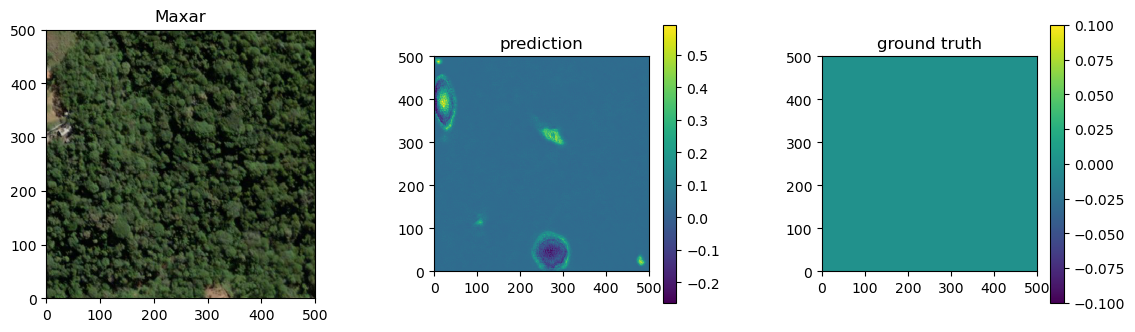

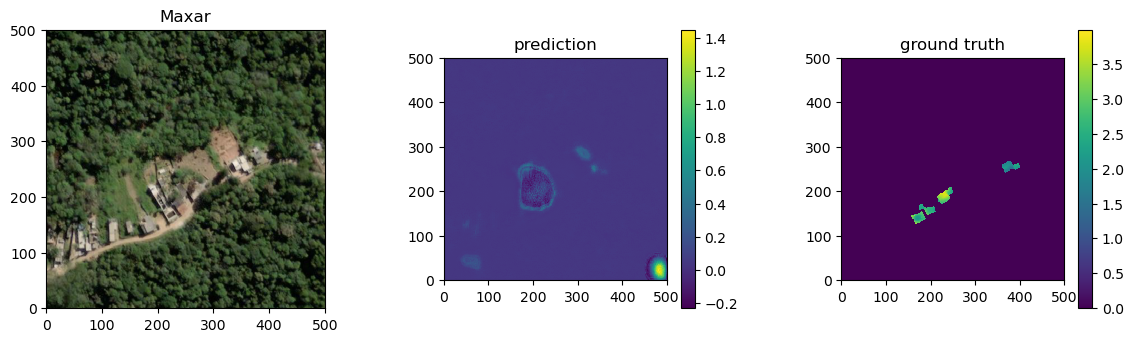

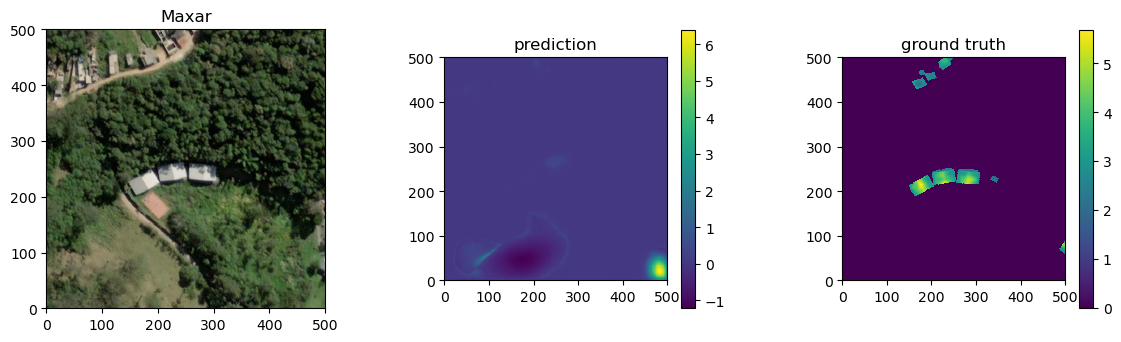

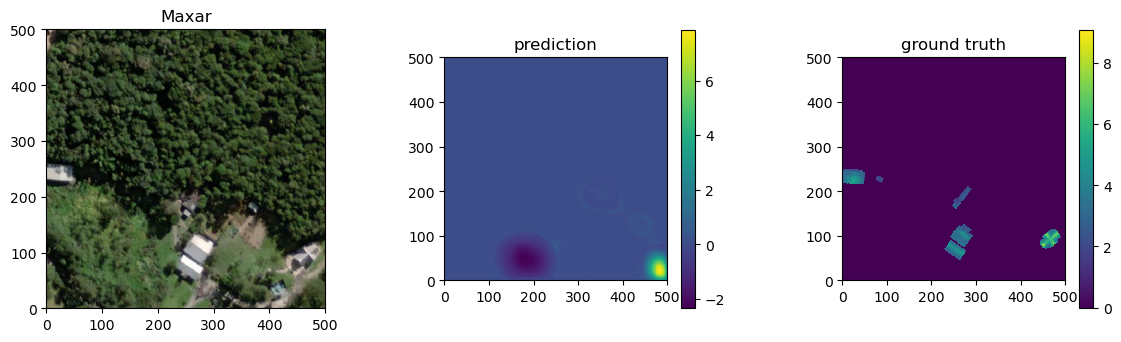

In [74]:
for name in glob.glob(path + "train_maxar_sliced/*-3215-113_y*x300.npy"):
    plot_pair(
        np.load(name),
        np.load(name.replace("train_maxar_sliced", "train_maxar_sliced_predict")),
        np.load(name.replace("train_maxar_sliced/maxar", "train_bhm_sliced/bhm")),
    )
    file_name = name[name.find("ar-") + 3 : name.find(".npy")]
    plt.savefig(
        path + "predict_plots/" + "maxar_predict_bhm_" + file_name + ".png",
        transparent=True,
        bbox_inches="tight",
    )

Plot and save plots for tile 3215-243

/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-243_y0x300.png
/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-243_y300x300.png
/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-243_y600x300.png
/home/dana/data/UNICEF_data/tim_maxar_bhm_final_pairs/pairs_10/predict_plot/maxar_predict_bhm_3215-243_y767x300.png


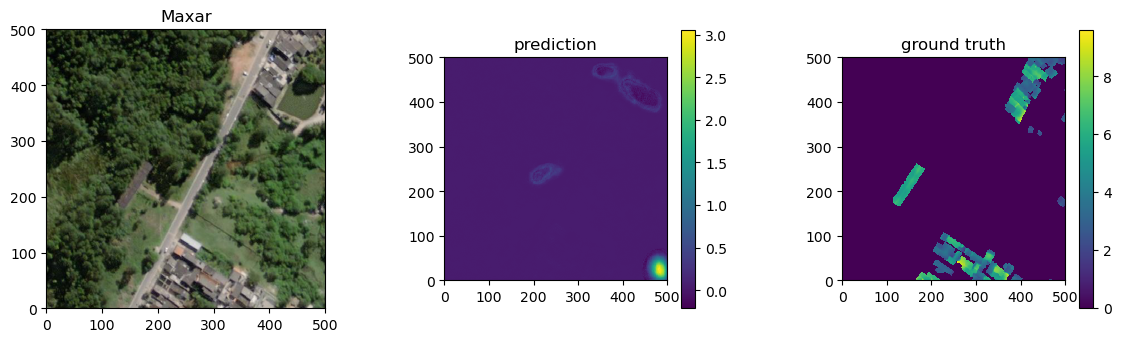

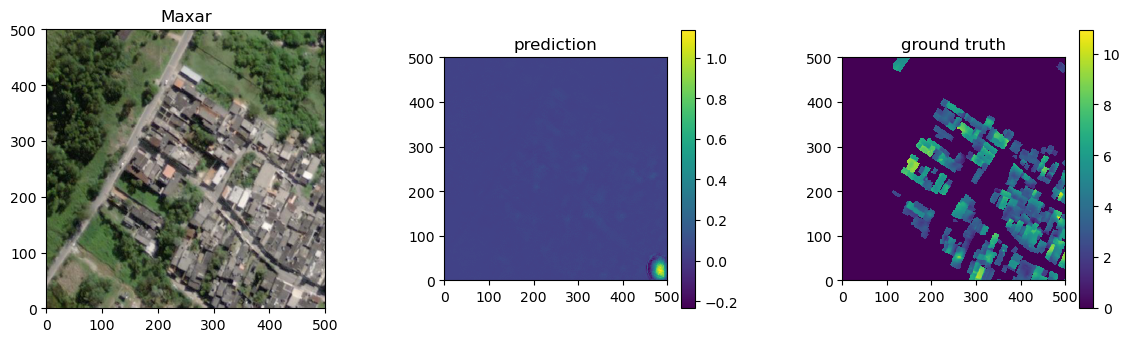

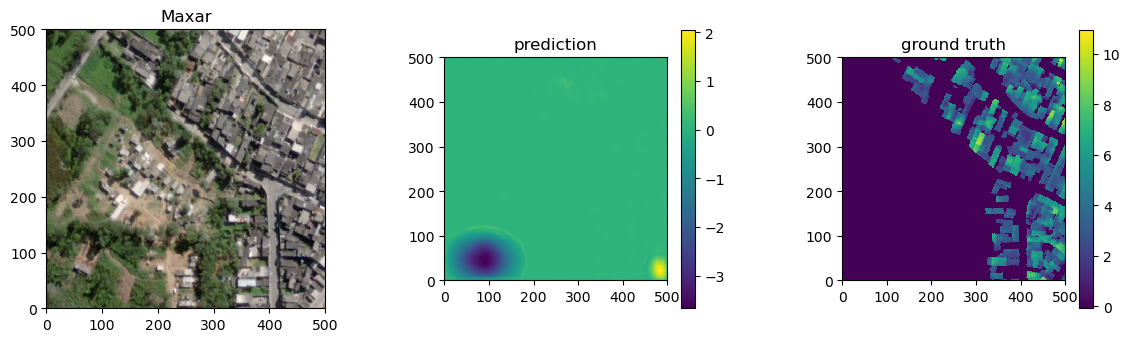

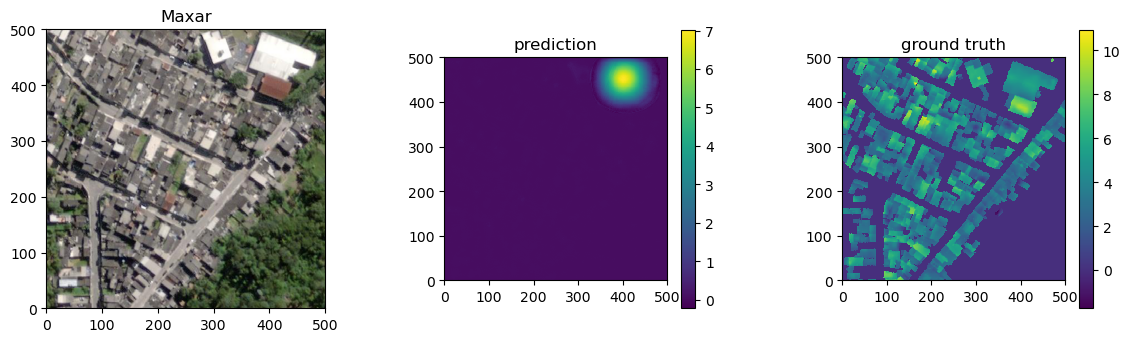

In [73]:
for name in glob.glob(path + "train_maxar_sliced/*-3215-243_y*x300.npy"):
    plot_pair(
        np.load(name),
        np.load(name.replace("train_maxar_sliced", "train_maxar_sliced_predict")),
        np.load(name.replace("train_maxar_sliced/maxar", "train_bhm_sliced/bhm")),
    )
    file_name = name[name.find("ar-") + 3 : name.find(".npy")]
    plt.savefig(
        path + "predict_plots/" + "maxar_predict_bhm_" + file_name + ".png",
        transparent=True,
        bbox_inches="tight",
    )